In [16]:
#pip install textblob

In [17]:

#pip install tweepy==4.10

In [18]:
import tweepy
import pandas as pd

import re
import textblob

import matplotlib.pyplot as plt
import numpy as np

In [19]:
consumer_key = "nkkYmkpMh1072Ct3fzefhl6rU"
consumer_secret = "VBONHahya7z7SGhU1mN2kCKO9D3uXr4V9bKQ1DHXOnLp6954QQ"
access_key = "1477970977292107779-6GFW0FAinhZ2sNPnMUvbZOCBLgLjoE"
access_secret = "nC1dzK1hx8MetIaFXBhunncGVlRx66kznf0l83tIYTL4C"

In [20]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [21]:
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAN4cgQEAAAAAgCC9MD22OlU8ROcEbhtltP5WgWY%3DdpcmGlBeTdQm9YP1GYKvZbXc7n8NTROtLhaSKebEIIsx3Dgtzg')

In [22]:
query = '#kanye -is:retweet lang:en'

In [23]:
response = client.search_recent_tweets(
    query,
    max_results = 10,
    
    tweet_fields = ['author_id','created_at','text','source','lang','geo'],
    user_fields = ['name','username','location','verified'],
    expansions = ['geo.place_id', 'author_id'],
    place_fields = ['country','country_code']
)
includes = response.includes
users = includes["users"]
users = {user["id"]: user for user in users}

In [24]:
df = pd.DataFrame(columns=['id','tweet_id','username','is_retweet',
'text','links','hashtags','user_tags','media_id',
'date','location', 'source', 'lang'])

In [25]:
for tweet in response.data:
    
    # status = tweepy(client.access_token).get_status(tweet.id)
    stsr = tweet.text.split()
    hash = [i for i in stsr if i.startswith('@')]
   
    urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', tweet.text)
    
    urrl = []
    for j in urls:
      urrl.append([i for i in stsr if i.startswith(j)])
    try:
        urrl = urrl[0]
    except:
        urrl = []

    cl_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.text).split())


    analysis = None
    sent = None
    analysis = textblob.TextBlob(cl_text)

    if analysis.sentiment.polarity > 0:
      sent= 'positive'
    elif analysis.sentiment.polarity == 0:
        sent= 'neutral'
    else:
        sent='negative'

    print("\n",tweet.text,)
    user_in = input("\n1 : Positive \n 2 : Negative\n 3 : Neutral\n:")
    
    usent = None

    if user_in == 1:
      usent= 'positive'
    elif user_in == 2:
        usent= 'neutral'
    else:
        usent='negative'
    
    new_row = pd.Series({
    'tweet_id': tweet.id , 
    'id': tweet.author_id,
    'username': users[tweet.author_id].username, 
    'text': tweet.text,
    'clean_text': cl_text,
    'verified' : users[tweet.author_id].verified,
    'hashtags': hash,
    'user_tags': tweet.text.startswith("@"),
    'media_id': None,
    'links': urrl,
    
    'location': users[tweet.author_id].location,
    'source': tweet.source,
    'lang': tweet.lang,
    'date': tweet.created_at,


    'sentiment':sent,
    "user_sentiment":usent,
    'analysis':analysis,
    })
    df =  pd.concat([
            df, 
            pd.DataFrame([new_row], columns=new_row.index)]
       ).reset_index(drop=True)





 Hey friends please tap this link and feel what I'm feeling.

https://t.co/iFEvlSEfjk

| #Kanye, #UtamaduniDay, #GOAT𓃵 , Nairobians, Grammy, Healnderson, Racism, Right G, Zelensky, JKIA, Kyiv, Resign, Arabs, Kamket |

 I guess “death-con 3” *snicker* will have to wait.. I mean it’s one thing to be in support of anti- black sentiments but IMPLY you’ll be anti-Semitic? Well now, you’ve crossed the rubicon, sir… #accountsuspended #howdareyou? #kanye #kanyewestdoesntcareaboutblackpeople

 #Kanye How is this guy still on Twitter? If saying you want to kill Jews is not disqualifying then America has truly entered a brave new world. One full of peril and dread. And what do we hear from Republicans? Crickets.

 Jack Antonoff calling out @kanyewest for being “anti-Semitic” 

#jackantonoff #Kanye #beef https://t.co/jWFWy78Gdg

 Twitter would then become a liability to Elon Musk and he'd have to answer to why he would allow that bigotry to thrive here: remember he lost polls and his peace plan f

In [26]:
df.head(100)

,id,tweet_id,username,is_retweet,text,links,hashtags,user_tags,media_id,date,location,source,lang,clean_text,verified,sentiment,user_sentiment,analysis
0,1503296124530135040,1579395374414200832,Throne_ing,NaN,Hey friends please tap this link and feel what...,[https://t.co/iFEvlSEfjk],[],False,None,2022-10-10 08:56:15+00:00,Watch The Throne,Twitter Web App,en,Hey friends please tap this link and feel what...,False,positive,negative,"(H, e, y, , f, r, i, e, n, d, s, , p, l, e, ..."
1,17166963,1579395234366377984,quinnmusic,NaN,I guess “death-con 3” *snicker* will have to w...,[],[],False,None,2022-10-10 08:55:42+00:00,"On Stage, or In Your Heart",Twitter for iPhone,en,I guess death con 3 snicker will have to wait ...,False,negative,negative,"(I, , g, u, e, s, s, , d, e, a, t, h, , c, ..."
2,1371173921341444099,1579395149981192193,petergarber5,NaN,#Kanye How is this guy still on Twitter? If sa...,[],[],False,None,2022-10-10 08:55:22+00:00,North shore of Lake Ontario,Twitter for iPhone,en,Kanye How is this guy still on Twitter If sayi...,False,positive,negative,"(K, a, n, y, e, , H, o, w, , i, s, , t, h, ..."
3,1579378691389370369,1579395080649334784,PresswingTrends,NaN,Jack Antonoff calling out @kanyewest for being...,[https://t.co/jWFWy78Gdg],[@kanyewest],False,None,2022-10-10 08:55:05+00:00,None,Twitter for iPhone,en,Jack Antonoff calling out for being anti Semit...,False,neutral,negative,"(J, a, c, k, , A, n, t, o, n, o, f, f, , c, ..."
4,1440710034296479751,1579394792517435393,dayashappiness_,NaN,Twitter would then become a liability to Elon ...,[https://t.co/S1zhqRHWSm],[],False,None,2022-10-10 08:53:56+00:00,None,Twitter Web App,en,Twitter would then become a liability to Elon ...,False,negative,negative,"(T, w, i, t, t, e, r, , w, o, u, l, d, , t, ..."
5,299354235,1579394654973628420,OpTrusteeLG,NaN,@Spy5Wire I wake up at 4:50am in New York Mond...,[],[@Spy5Wire],True,None,2022-10-10 08:53:24+00:00,United States,Twitter for iPhone,en,I wake up at 4 50am in New York Monday morning...,False,positive,negative,"(I, , w, a, k, e, , u, p, , a, t, , 4, , ..."
6,1523312334760189953,1579394531895955456,M_Bustle,NaN,"Kanye West Instagram restricted, Elon Musk rea...",[https://t.co/0llI92h4iS],[],False,None,2022-10-10 08:52:54+00:00,United States Of America,Twitter Web App,en,Kanye West Instagram restricted Elon Musk reac...,False,neutral,negative,"(K, a, n, y, e, , W, e, s, t, , I, n, s, t, ..."
7,1541585725069688833,1579393194005266432,htownhustlerr,NaN,#kanye is well within his right to exercise hi...,[],[],False,None,2022-10-10 08:47:35+00:00,None,Twitter for iPhone,en,kanye is well within his right to exercise his...,False,negative,negative,"(k, a, n, y, e, , i, s, , w, e, l, l, , w, ..."
8,1545313474128973824,1579392316573626369,quehacelamafia,NaN,I need a freaky bitch in abq to come suck some...,[https://t.co/6Nue6UqEpB],[],False,None,2022-10-10 08:44:06+00:00,"Albuquerque, NM",Twitter for iPhone,en,I need a freaky bitch in abq to come suck some...,False,positive,negative,"(I, , n, e, e, d, , a, , f, r, e, a, k, y, ..."
9,1175125051961724928,1579391935546273792,BurninLove01,NaN,Some things just need to be said. I commend Wi...,[https://t.co/ygGJ6FVVX6],[],False,None,2022-10-10 08:42:35+00:00,None,Twitter for iPhone,en,Some things just need to be said I commend Wil...,False,neutral,negative,"(S, o, m, e, , t, h, i, n, g, s, , j, u, s, ..."


In [27]:
#Sentiment percent
ptweets = []
ntweets = []
nntweets = []
for index, row in df.iterrows():
  if row['sentiment'] == 'positive':
    ptweets.append(row['text'])
  elif row['sentiment'] == 'negative':
    ntweets.append(row['text'])
  else:
    nntweets.append(row['text'])

positive = 100*len(ptweets)/df.shape[0]
negative = 100*len(ntweets)/df.shape[0]
neutral = 100*len(nntweets)/df.shape[0]

print("Positive tweets percentage: {} %".format(positive))
print("Negative tweets percentage: {} %".format(negative))
print("Neutral tweets percentage: {} %".format(neutral))

Positive tweets percentage: 40.0 %
Negative tweets percentage: 30.0 %
Neutral tweets percentage: 30.0 %


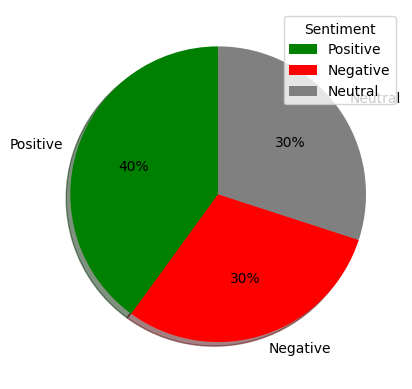

In [33]:
#y = np.array([positive, negative, neutral])

y = np.array([len(ptweets), len(ntweets), len(nntweets)])
mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["green", "red", "grey"]

plt.pie(y, labels = mylabels, startangle = 90, colors = mycolors, shadow = True, autopct='%1.0f%%')
plt.legend(title = "Sentiment")
plt.show() 

In [32]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [30]:
# target_cnt = Counter(df.target)

# plt.figure(figsize=(16,8))
# plt.bar(target_cnt.keys(), target_cnt.values())
# plt.title("Dataset labels distribuition")